# **BINOMIAL PRICING MODEL**

In [ ]:
#installing library
!pip install yfinance

**IMPORTING THE LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date

import warnings
warnings.filterwarnings("ignore")

# to fetch data
import yfinance as yf

import scipy.stats as ss

**IMPORTING DATA**

In [ ]:
symbol = '^SPX'
end = date.today()
start = end.replace(year = 2023)

tickerData = yf.Ticker(symbol)

# Read data
df = tickerData.history(start=start, end=end)


df.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-12-16 00:00:00-05:00,6063.790039,6085.189941,6059.140137,6074.080078,4391100000,0.0,0.0
2024-12-17 00:00:00-05:00,6052.549805,6057.680176,6035.189941,6050.609863,4544500000,0.0,0.0
2024-12-18 00:00:00-05:00,6047.649902,6070.669922,5867.790039,5872.160156,5246960000,0.0,0.0
2024-12-19 00:00:00-05:00,5912.709961,5935.520020,5866.069824,5867.080078,4896880000,0.0,0.0
2024-12-20 00:00:00-05:00,5842.000000,5982.060059,5832.299805,5930.850098,8223220000,0.0,0.0


In [ ]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-22 00:00:00-05:00,4753.919922,4772.939941,4736.770020,4754.629883,3046770000,0.0,0.0
2023-12-26 00:00:00-05:00,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,0.0,0.0
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,0.0,0.0
2023-12-28 00:00:00-05:00,4786.439941,4793.299805,4780.979980,4783.350098,2698860000,0.0,0.0
2023-12-29 00:00:00-05:00,4782.879883,4788.430176,4751.990234,4769.830078,3126060000,0.0,0.0


In [ ]:
symbol = '^SPX'  #the ticker of the stock whose data is to be taken out
dfo = yf.Ticker(symbol)

In [ ]:
dfo.options  #to get the date of different expiration time

('2024-12-23',
 '2024-12-24',
 '2024-12-26',
 '2024-12-27',
 '2024-12-30',
 '2024-12-31',
 '2025-01-02',
 '2025-01-03',
 '2025-01-06',
 '2025-01-07',
 '2025-01-08',
 '2025-01-09',
 '2025-01-10',
 '2025-01-13',
 '2025-01-14',
 '2025-01-15',
 '2025-01-16',
 '2025-01-17',
 '2025-01-21',
 '2025-01-22',
 '2025-01-24',
 '2025-01-27',
 '2025-01-29',
 '2025-01-31',
 '2025-02-07',
 '2025-02-21',
 '2025-02-28',
 '2025-03-21',
 '2025-03-31',
 '2025-04-17',
 '2025-04-30',
 '2025-05-16',
 '2025-05-30',
 '2025-06-20',
 '2025-06-30',
 '2025-07-18',
 '2025-08-15',
 '2025-09-19',
 '2025-09-30',
 '2025-10-17',
 '2025-11-21',
 '2025-12-19',
 '2026-01-16',
 '2026-03-20',
 '2026-06-18',
 '2026-12-18',
 '2027-12-17',
 '2028-12-15',
 '2029-12-21')

In [ ]:
dfo_exp = dfo.option_chain(dfo.options[1])  #you can change index to try on different expiry dates

In [ ]:
dfo_exp.calls.head() #Data for call options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW241224C05000000,2024-12-18 20:41:14+00:00,5000.0,898.20,921.9,940.7,0.00000,0.00000,1.0,2.0,0.712161,True,REGULAR,USD
1,SPXW241224C05150000,2024-12-19 14:31:36+00:00,5150.0,780.12,772.1,790.7,0.00000,0.00000,1.0,1.0,0.613285,True,REGULAR,USD
2,SPXW241224C05400000,2024-12-06 15:05:30+00:00,5400.0,706.70,522.3,541.0,0.00000,0.00000,NaN,NaN,0.686221,True,REGULAR,USD
3,SPXW241224C05650000,2024-11-18 20:26:03+00:00,5650.0,298.33,272.8,291.3,0.00000,0.00000,NaN,1.0,0.418341,True,REGULAR,USD
4,SPXW241224C05700000,2024-12-20 09:08:45+00:00,5700.0,164.31,223.3,241.9,-197.39001,-54.57285,10.0,8.0,0.367407,True,REGULAR,USD


# **Calculation of u and d**

u =size of the up move factor=
 e^{σ\sqrt{t}}, and

d =size of the down move factor=
 = e^{−σ\sqrt{t}}
 = 1/ u

σ is the annual volatility of the underlying asset’s returns and t is the length of the step in the binomial model.

To calculate annual volatility:-

First calculate the daily returns of the asset

Then calculate its standard deviation

Then multiply it by sqrt(252) as in a year there are 252 trading days.



In [ ]:
def annual_vol(df):
    """
    Function to calculate annual volatility

    Parameters
    ----------
    df : dataframe
         Stock info

    Returns
    -------
    vol : float
        annual volatility of the stock
    """

    log_return =df['Log Return']=np.log(df['Close']/df['Close'].shift(1))
    log_return = df=df.dropna()
    daily_vol = df['Log Return'].std()
    vol = daily_vol*np.sqrt(252)

    return vol

In [ ]:
vol = annual_vol(df)
vol

0.1254703352977609

In [ ]:
dfo.options[1]

'2024-12-24'

In [ ]:
date.today()

datetime.date(2024, 12, 22)

In [ ]:
N = 100          #Number of steps

# Loop through all expiration dates in dfo.options
for expiry in dfo.options:
    # Convert expiry date from string to date object
    expiry_date = date.fromisoformat(expiry)

    # Calculate time to expiry in years
    T= (expiry_date - date.today()).days / 365
    t = T/N

    # Print the result
    print(f"Expiration Date: {expiry_date} | Time to Expiry: {T:.4f} years")
    print(t)


Expiration Date: 2024-12-23 | Time to Expiry: 0.0027 years
2.7397260273972603e-05
Expiration Date: 2024-12-24 | Time to Expiry: 0.0055 years
5.479452054794521e-05
Expiration Date: 2024-12-26 | Time to Expiry: 0.0110 years
0.00010958904109589041
Expiration Date: 2024-12-27 | Time to Expiry: 0.0137 years
0.000136986301369863
Expiration Date: 2024-12-30 | Time to Expiry: 0.0219 years
0.00021917808219178083
Expiration Date: 2024-12-31 | Time to Expiry: 0.0247 years
0.0002465753424657534
Expiration Date: 2025-01-02 | Time to Expiry: 0.0301 years
0.00030136986301369865
Expiration Date: 2025-01-03 | Time to Expiry: 0.0329 years
0.0003287671232876712
Expiration Date: 2025-01-06 | Time to Expiry: 0.0411 years
0.000410958904109589
Expiration Date: 2025-01-07 | Time to Expiry: 0.0438 years
0.00043835616438356166
Expiration Date: 2025-01-08 | Time to Expiry: 0.0466 years
0.0004657534246575343
Expiration Date: 2025-01-09 | Time to Expiry: 0.0493 years
0.0004931506849315068
Expiration Date: 2025-01-

In [ ]:
df['Log Return']=np.log(df['Close']/df['Close'].shift(1))
df=df.dropna()
daily_vol = df['Log Return'].std()
u = np.exp(daily_vol * np.sqrt(t))
u

1.001768925835354

In [ ]:
d = np.exp(-daily_vol * np.sqrt(t))
d

0.9982341977378876

Let S denote the price of the stock today, and let T denote the time until expiry of the option, in years. We'll divide this period into N equal time intervals, of length ΔT=T/N Assume that in each time period, the stock price changes by either multiplying by u, which we consider as an up movement, or by d, the down movement. We need to assume d<erΔT<u, where r is the risk-free interest rate, to avoid the possibility of arbitrage. If k time periods have passed, m is number if up movement : S(k,m)=S * u ** m * d ** (k-m)

C(N,m)=max(S(N,m)−K,0)

Once we know the value of the option at the end of the tree, we can work backward as before to figure out the value of the option at every node. Let C(k,m) denote the value of the option at the node that is k steps into the tree with m up movements in the stock price. The two following nodes in the tree are C(k+1,m+1) (if the price moves up) and C(k+1,m) (if the price moves down). If we let p denote the risk-neutral probability

p = (e**(rΔT)−d)/(u−d)

of a movement up, then the expected value of the option in the next step is pC(k+1,m+1)+(1−p)C(k+1,m)

and so the value of the option at C(k,m) is the above expected value, discounted to today using the risk-free interest rate. That is

C(k,m)=e−rΔT(pC(k+1,m+1)+(1−p)C(k+1,m))

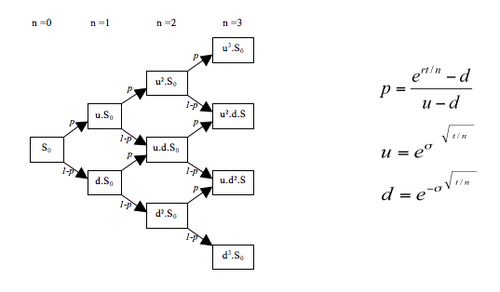

In [ ]:
def first_binomial_call(S, K, T, r, u, d, N):
    """
    Implementation of binomial pricing model

    Parameters
    ----------
    S : float
        stock price

    K : float
        strike price

    T : float
        expiry time in years

    r : float
        risk free rate which could be taken out of the yield of US treasury bonds

    u : float
        size of upfactor move

    d : float
        size of downfactor move

    N : int
        number of steps in binomial model

    Returns
    -------
    C : dict
        the binary pricing model in the form of dictionary
    """

import numpy as np

def first_binomial_american(S, K, T, r, u, d, N, option_type):
    """
    Implementation of binomial pricing model for American options.

    Parameters
    ----------
    S : float
        Stock price
    K : float
        Strike price
    T : float
        Expiry time in years
    r : float
        Risk-free rate (annualized, continuous compounding)
    u : float
        Size of up move factor
    d : float
        Size of down move factor
    N : int
        Number of steps in the binomial model
    option_type : char
        'C' for Call, 'P' for Put

    Returns
    -------
    price : float
        Returns the price of the option
    """

    # Calculate the time step size
    dt = T / N

    # Calculate risk-neutral probabilities
    p_up = (np.exp(r * dt) - d) / (u - d)
    p_down = 1 - p_up

    # Initialize the option values at maturity
    option_values = np.zeros(N + 1)

    # Calculate the option values at the final step (maturity)
    for i in range(N + 1):
        S_T = S * (u ** i) * (d ** (N - i))  # Stock price at maturity
        if option_type == 'C':
            option_values[i] = max(0, S_T - K)  # Call option payoff
        elif option_type == 'P':
            option_values[i] = max(0, K - S_T)  # Put option payoff

    # Backward induction to calculate option price at each node
    for n in range(N - 1, -1, -1):
        for i in range(n + 1):
            S_t = S * (u ** i) * (d ** (n - i))  # Stock price at current node
            # Calculate option value assuming no early exercise (continuation value)
            continuation_value = np.exp(-r * dt) * (p_up * option_values[i + 1] + p_down * option_values[i])
            # American option: take the maximum of continuation value and early exercise value
            if option_type == 'C':
                option_values[i] = max(continuation_value, S_t - K)  # Call option
            elif option_type == 'P':
                option_values[i] = max(continuation_value, K - S_t)  # Put option

    # The option price is at the initial node (time 0)
    return option_values[0]


In [ ]:
# Assuming `first_binomial_call` is defined correctly and returns a single value
call = {}
for K in dfo_exp.calls['strike']:
    # Calculate the call price using the binomial model
    call_price = first_binomial_american(S=df['Close'].iloc[-1], K=K, T=T, r=0.01, u=u, d=d, N=N, option_type='C')

    # Store the call price for each strike price
    call[K] = call_price

# Convert the dictionary to a DataFrame
th_call = pd.DataFrame.from_dict(call, orient='index')

# Rename the column for clarity
th_call.rename(columns={0: "th_call"}, inplace=True)

# Display the result
print(th_call.head())


            th_call
5000.0  1174.702975
5150.0  1032.018561
5400.0   794.211205
5650.0   556.403849
5700.0   508.842380


In [ ]:
#actual call price
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace=True)
ac_call.head()

,ac_call
strike,
5000.0,898.20
5150.0,780.12
5400.0,706.70
5650.0,298.33
5700.0,164.31


from matplotlib import pyplot as plt
_df_0['ac_call'].plot(kind='hist', bins=20, title='ac_call')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['ac_call'].plot(kind='line', figsize=(8, 4), title='ac_call')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
call = th_call
call["ac_call"] = ac_call
call.head(10)

,th_call,ac_call
5000.0,1174.702975,898.20
5150.0,1032.018561,780.12
5400.0,794.211205,706.70
5650.0,556.403849,298.33
5700.0,508.842380,164.31
5730.0,480.305508,183.61
5740.0,470.793221,360.10
5750.0,461.280941,118.96
5760.0,451.768667,306.10
5770.0,442.256408,331.25


from matplotlib import pyplot as plt
_df_2['th_call'].plot(kind='hist', bins=20, title='th_call')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['ac_call'].plot(kind='hist', bins=20, title='ac_call')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='th_call', y='ac_call', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['th_call'].plot(kind='line', figsize=(8, 4), title='th_call')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['ac_call'].plot(kind='line', figsize=(8, 4), title='ac_call')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: >

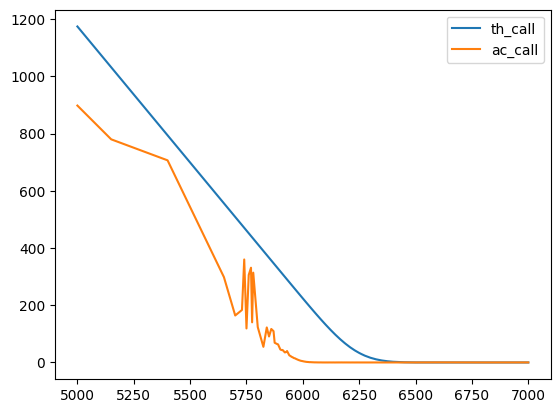

In [ ]:
call.plot() #plotting the actual and theoretical option prices

# **BLACK-SCHOLES MODEL**


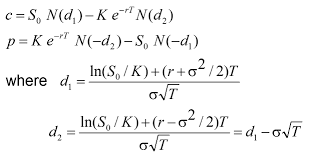

C : call option price

P : Put option price

S : Stock price

K : Strike price

r : risk free rate

t : time of maturity in year

N = Normal distribution

In [ ]:
import numpy as np
from scipy.stats import norm

def euro_vanilla(S, K, T, r, sigma, option):
    """
    To calculate options price with the help of Black-Scholes model

    Parameters
    ----------
    S : float
        The price of the underlying

    K : float
        Strike price of the option

    T : float
        Time to expiry in years

    r : float
        Risk free rate which can be taken as the US Treasury bond yield

    sigma : float
        The annual volatility of the returns

    option : string
        'call' for call option
        'put' for put option

    Returns
    -------
    premium : float
        The price of call or put option
    """

    # Calculate d1 and d2 using the Black-Scholes formula
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    # Option pricing based on whether it's a call or put
    if option == 'call':
        premium = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option == 'put':
        premium = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Option type must be 'call' or 'put'")

    return premium


In [ ]:
dfo.options[1]

'2024-12-24'

In [ ]:
date.today()

datetime.date(2024, 12, 22)

In [ ]:
from datetime import datetime

# Example: Expiration date (change this to the actual expiration date)
expiration_date = datetime(2024, 12, 31)  # Replace with your option's expiration date

# Current date
current_date = datetime.now()

# Calculate the number of days left
days_left = (expiration_date - current_date).days

# Convert days_left to years (assuming 365 days in a year)
T = days_left / 365

print(f"Time to expiration in years (T): {T}")


N = 100
# T = /365      #Calculate the number of days left for expiry from your calculation in years
t = T/N

Time to expiration in years (T): 0.021917808219178082


In [ ]:
call = {}
for K in dfo_exp.calls['strike']:
    # Calculate the call price using the Black-Scholes model
    call_price = euro_vanilla(S=df['Close'].iloc[-1], K=K, T=T, r=0.0123, sigma=vol, option='call')

    # Store the calculated call price for each strike price
    call[K] = call_price

# Convert the dictionary to a DataFrame
th_call = pd.DataFrame.from_dict(call, orient='index')

# Rename the column for clarity
th_call.rename(columns={0: "th_call"}, inplace=True)

# Display the result
print(th_call.head())


           th_call
5000.0  932.197861
5150.0  782.238294
5400.0  532.305686
5650.0  282.517844
5700.0  232.991219


In [ ]:
#actual call price
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace=True)
ac_call.head()

,ac_call
strike,
5000.0,898.20
5150.0,780.12
5400.0,706.70
5650.0,298.33
5700.0,164.31


In [ ]:
call = th_call
call["ac_call"] = ac_call
call.head(10)

,th_call,ac_call
5000.0,932.197861,898.20
5150.0,782.238294,780.12
5400.0,532.305686,706.70
5650.0,282.517844,298.33
5700.0,232.991219,164.31
5730.0,203.690605,183.61
5740.0,194.042891,360.10
5750.0,184.473938,118.96
5760.0,174.997330,306.10
5770.0,165.628024,331.25


<Axes: >

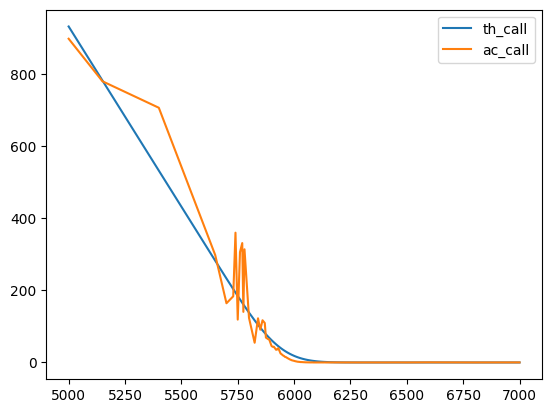

In [ ]:
call.plot() #plotting the actual and theoretical call prices

In [ ]:
#r is the risk free rate taken from the 10 years us treasury bond
#theoretical put price calculated from black scholes model
put = {}
for K in dfo_exp.puts['strike']:
    put_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0158*t, sigma=vol, option = 'put')
  # print(put_price)
    put[K] = put_price
th_put = pd.DataFrame.from_dict(put, orient='index')
th_put.rename(columns = {0:"th_put"}, inplace = True)
th_put.head()

,th_put
2400.0,0.000000e+00
2600.0,0.000000e+00
2800.0,0.000000e+00
3000.0,1.076975e-294
3200.0,7.496378e-242


In [ ]:
#actual put price
ac_put = dfo_exp.puts.loc[:, ['strike', 'lastPrice']]
ac_put.set_index('strike', inplace = True)
ac_put.rename(columns = {"lastPrice":"ac_put"}, inplace=True)
ac_put.head()

,ac_put
strike,
2400.0,0.05
2600.0,0.05
2800.0,0.05
3000.0,0.10
3200.0,0.10


from matplotlib import pyplot as plt
_df_7['ac_put'].plot(kind='hist', bins=20, title='ac_put')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ac_put']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ac_put'}, axis=1)
              .sort_values('ac_put', ascending=True))
  xs = counted['ac_put']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('ac_put', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ac_put')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['ac_put'].plot(kind='line', figsize=(8, 4), title='ac_put')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
put = th_put
put["ac_put"] = ac_put
put.tail(10)

,th_put,ac_put
6140.0,210.503186,187.53
6145.0,215.358549,191.00
6150.0,220.227781,168.72
6155.0,225.109741,79.10
6170.0,239.821668,181.10
6175.0,244.744555,113.92
6180.0,249.675506,128.33
6225.0,294.311570,290.70
6275.0,344.187459,179.64
6300.0,369.166836,346.05


<Axes: >

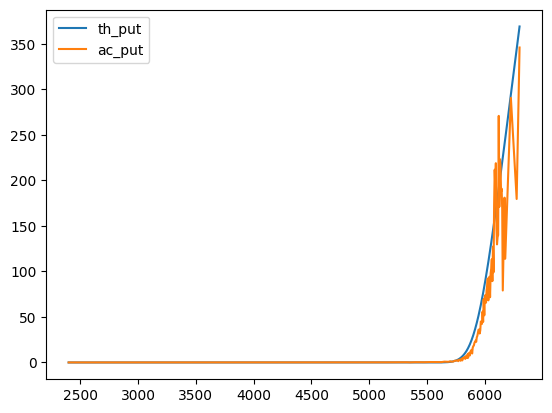

In [ ]:
put.plot()